In [1]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

!pip install joblib -q
import joblib

In [2]:
RANDOM_STATE = 42

In [3]:
def num_func(data):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    plt.subplot(1,2,1)
    plt.hist(data, bins=30, ec='black', color='y', alpha=0.5)
    plt.title('Распределение', size=15)
    plt.ylabel('Частота', size=12)
    plt.grid(linestyle='dashed')
    plt.subplot(1,2,2)
    plt.boxplot(data, vert=False)
    plt.title('Ящик с усами', size=15)
    plt.grid(linestyle='dashed')
    plt.show()
    print('Описательная статистика:')
    print(data.describe())

In [4]:
colors = sns.color_palette("husl", 9)
def cat_func(data):
    print()
    print(data.value_counts())
    data.value_counts(ascending=True).plot(kind='barh',
                             alpha=0.5)
    plt.title('Столбчатая диаграмма', size=15)
    plt.xticks(rotation=0)
    plt.xlabel('Количество', size=12)
    plt.ylabel('Значения', size=12)
    plt.show()
    print('\n')
    data.value_counts().plot(kind='pie',
                             legend=True,
                             autopct='%.2f%%',
                             textprops={'color':'white', 'size':15},
                             figsize=(8, 6), colors=colors)
    plt.legend(bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Круговая диаграмма', size=15)
    plt.ylabel(None)
    plt.show()
    print('\n')

In [5]:
data = pd.read_csv('scoring.csv')

In [6]:
data.head()

,age,income,education,work,car,default
0,27,32,0,0,1,0
1,26,50,1,0,0,0
2,35,20,0,1,0,0
3,35,80,1,1,0,0
4,24,27,0,0,0,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180816 entries, 0 to 180815
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   age        180816 non-null  int64
 1   income     180816 non-null  int64
 2   education  180816 non-null  int64
 3   work       180816 non-null  int64
 4   car        180816 non-null  int64
 5   default    180816 non-null  int64
dtypes: int64(6)
memory usage: 8.3 MB


Столбец "age"


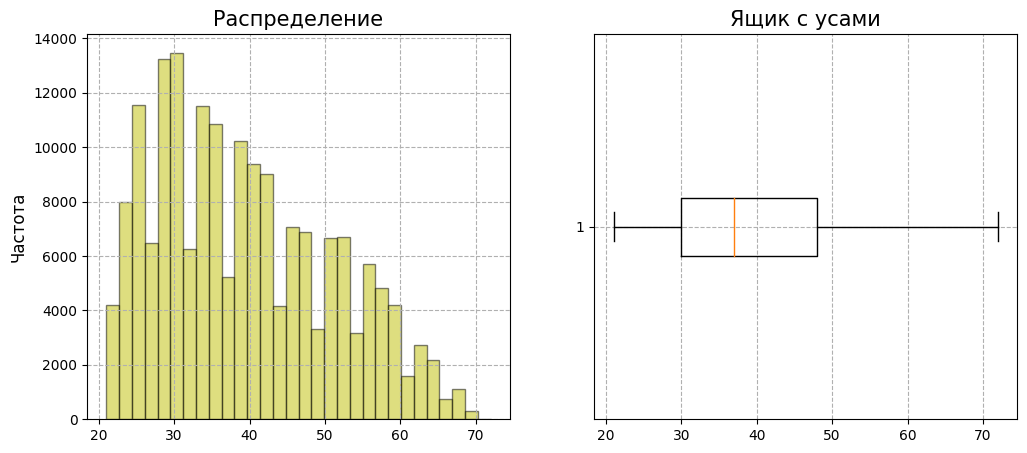

Описательная статистика:
count    180816.000000
mean         39.326254
std          11.528616
min          21.000000
25%          30.000000
50%          37.000000
75%          48.000000
max          72.000000
Name: age, dtype: float64


Столбец "income"


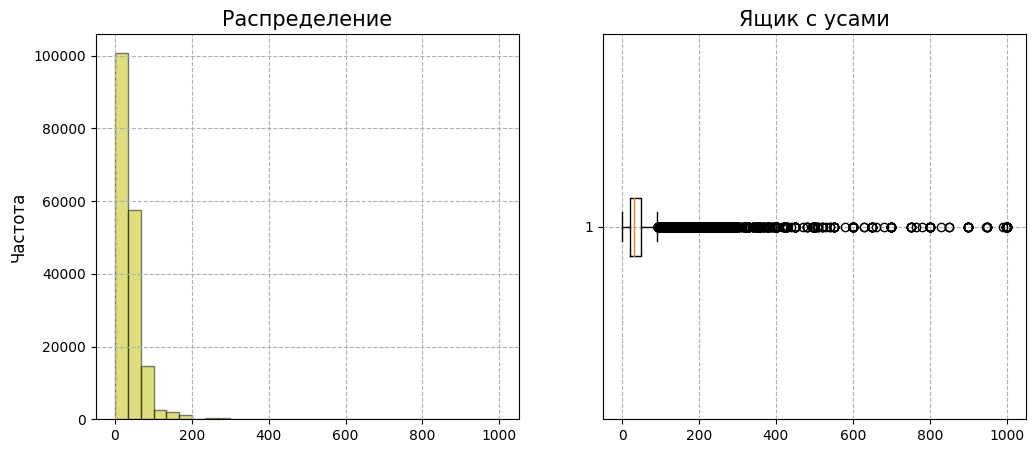

Описательная статистика:
count    180816.000000
mean         40.835402
std          43.228440
min           1.000000
25%          20.000000
50%          30.000000
75%          49.000000
max        1000.000000
Name: income, dtype: float64




In [8]:
data_num = data[['age', 'income']]
for i in data_num:
    print(f'Столбец "{i}"')
    num_func(data_num[i])
    plt.show()
    print('\n')

In [9]:
data['income'], _ = stats.boxcox(data['income'])

Столбец "income"


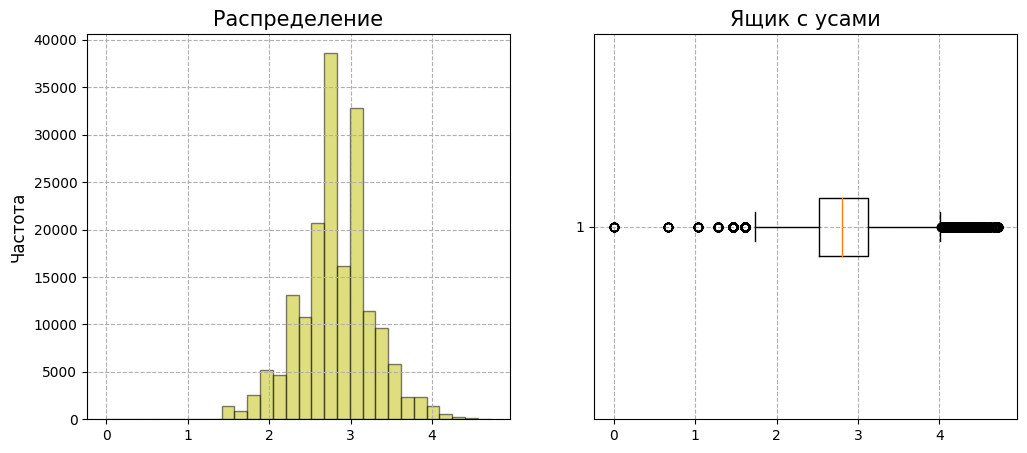

Описательная статистика:
count    180816.000000
mean          2.808200
std           0.457122
min           0.000000
25%           2.522316
50%           2.800048
75%           3.118773
max           4.719179
Name: income, dtype: float64




In [10]:
data_num = data[['income']]
for i in data_num:
    print(f'Столбец "{i}"')
    num_func(data_num[i])
    plt.show()
    print('\n')

Столбец "income"


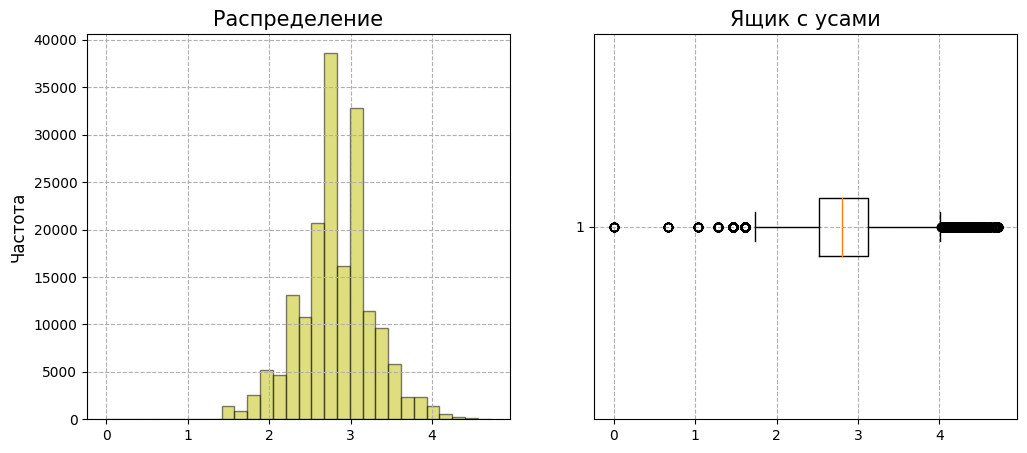

Описательная статистика:
count    180816.000000
mean          2.808200
std           0.457122
min           0.000000
25%           2.522316
50%           2.800048
75%           3.118773
max           4.719179
Name: income, dtype: float64




In [11]:
data_cat = data[['age', 'income']]
for i in data_num:
    print(f'Столбец "{i}"')
    num_func(data_num[i])
    plt.show()
    print('\n')

Столбец "education"

0    115989
1     64827
Name: education, dtype: int64


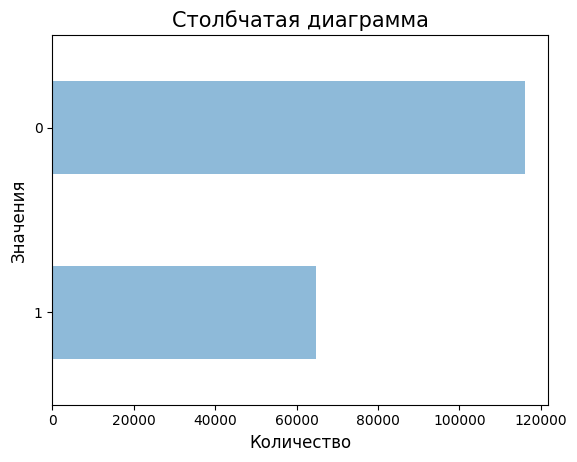

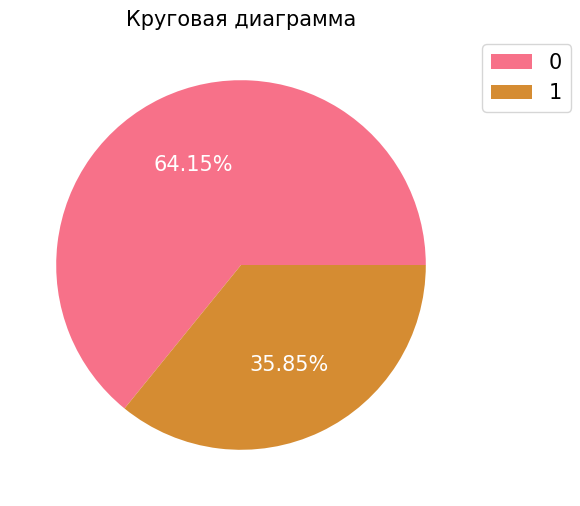





Столбец "work"

0    150918
1     29898
Name: work, dtype: int64


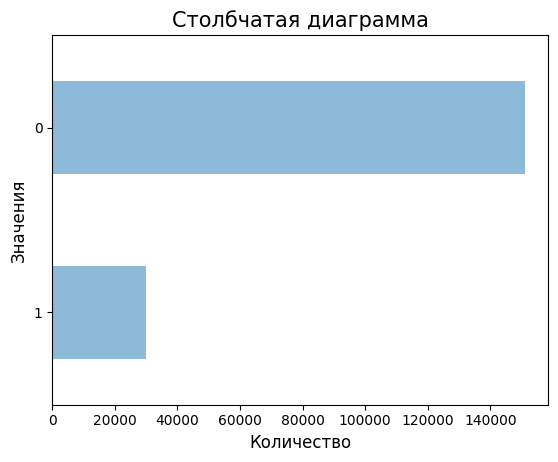

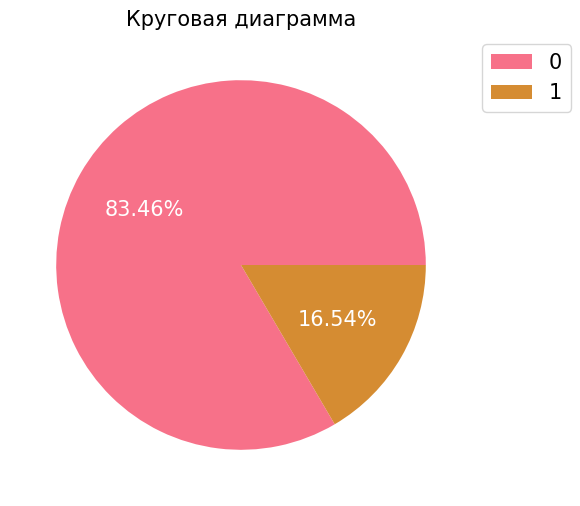





Столбец "car"

0    124511
1     56305
Name: car, dtype: int64


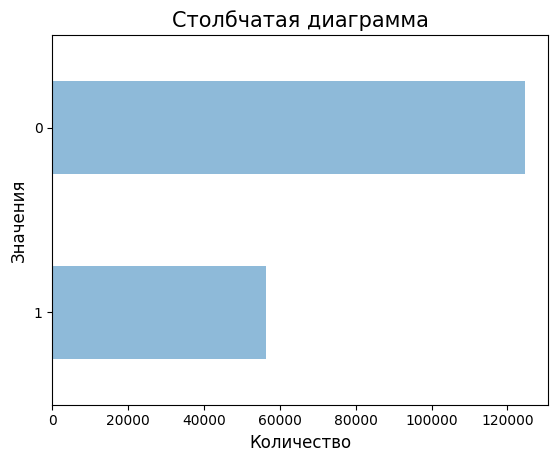

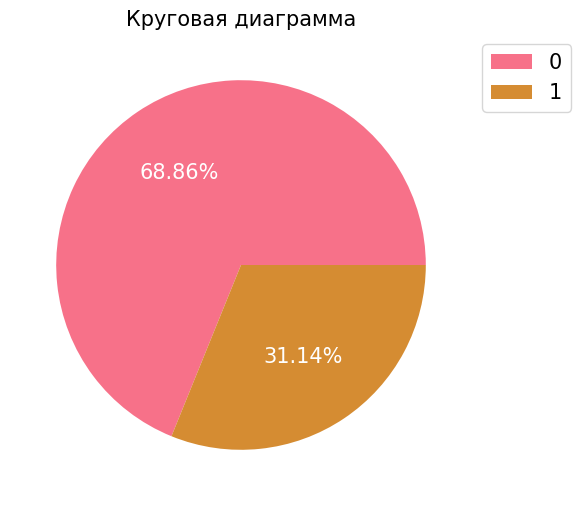





Столбец "default"

0    159982
1     20834
Name: default, dtype: int64


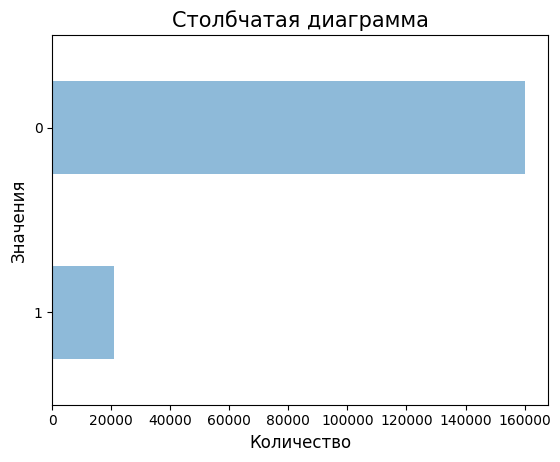

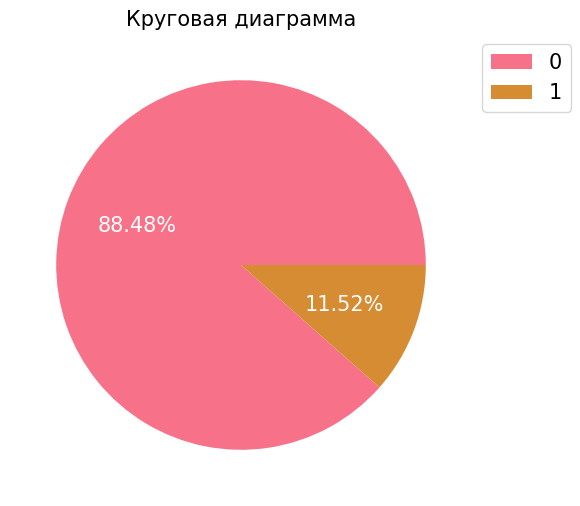

In [12]:
data_cat = data[['education', 'work', 'car', 'default']]
for i in data_cat:
    print(f'Столбец "{i}"')
    cat_func(data_cat[i])
    plt.show()
    print('\n')

In [13]:
X = data.drop(columns=["default"]).values
y = data["default"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

In [14]:
model = LogisticRegression(class_weight="balanced", random_state=42)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [15]:
y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [16]:
print(f"Отказано: {y_pred.mean() * 100:.0f}%")
print(f"Точность: {precision * 100:.0f}%")
print(f"Полнота:  {recall * 100:.0f}%")

Отказано: 53%
Точность: 14%
Полнота:  65%


In [17]:
# Создание пайплайна с стандартизацией
pipe_final = Pipeline([
    ('scaler', StandardScaler()),
    ('models', LogisticRegression())  # базовый классификатор
])

# Параметры для RandomizedSearchCV с учетом дисбаланса
param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight='balanced')],
        'models__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
        'models__min_samples_split': [2, 5, 10],
        'models__min_samples_leaf': [1, 2, 4],
    },
    {
        'models': [RandomForestClassifier(random_state=RANDOM_STATE, class_weight='balanced')],
        'models__n_estimators': [50, 100, 200],
        'models__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
        'models__min_samples_split': [2, 5, 10],
        'models__min_samples_leaf': [1, 2, 4],
    },
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, class_weight='balanced')],
        'models__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'models__solver': ['liblinear', 'lbfgs']
    }
]

# RandomizedSearchCV
randomized_search_1 = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter=20,  # количество комбинаций для проверки
    error_score='raise'
)

# Обучение на тренировочных данных
randomized_search_1.fit(X_train, y_train)

# Предсказания на тестовых данных
y_pred_proba = randomized_search_1.predict_proba(X_test)
y_pred_proba_one = y_pred_proba[:, 1]

# Метрики
print('Лучшая модель и её параметры:\n', randomized_search_1.best_estimator_)
print('\nПараметры лучшей модели:\n', randomized_search_1.best_params_)
print(f'\nМетрика ROC-AUC на кросс-валидации: {randomized_search_1.best_score_:.3f}')
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_pred_proba_one):.3f}')

# Дополнительные метрики с учетом дисбаланса
y_pred_best = randomized_search_1.predict(X_test)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)

print(f'\nЛучшая модель - Precision: {precision_best:.3f}, Recall: {recall_best:.3f}')

Лучшая модель и её параметры:
 Pipeline(steps=[('scaler', StandardScaler()),
                ('models',
                 RandomForestClassifier(class_weight='balanced', max_depth=6,
                                        min_samples_split=10, n_estimators=200,
                                        random_state=42))])

Параметры лучшей модели:
 {'models__n_estimators': 200, 'models__min_samples_split': 10, 'models__min_samples_leaf': 1, 'models__max_depth': 6, 'models': RandomForestClassifier(class_weight='balanced', random_state=42)}

Метрика ROC-AUC на кросс-валидации: 0.603
Метрика ROC-AUC на тестовой выборке: 0.596

Лучшая модель - Precision: 0.143, Recall: 0.624


In [18]:
joblib.dump(model, "model.pkl")

['model.pkl']